In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import h5py
import tensorflow as tf
import os
os.getcwd()

'C:\\Users\\rahim035\\DNNS_RR'

In [2]:
f = h5py.File("Dic_DPR_coast_v2.mat",'r')
list(f.keys())

['X_coast_trn_detection',
 'X_coast_tst_detection',
 'X_rain_coast_trn_retrieval',
 'X_rain_coast_tst_retrieval',
 'X_snow_coast_trn_retrieval',
 'X_snow_coast_tst_retrieval',
 'y_coast_trn_detection',
 'y_coast_tst_detection',
 'y_rain_coast_trn_retrieval',
 'y_rain_coast_tst_retrieval',
 'y_snow_coast_trn_retrieval',
 'y_snow_coast_tst_retrieval']

In [3]:
X0_trn_detection = f['X_coast_trn_detection']
y0_trn_detection = f['y_coast_trn_detection']
X0_tst_detection = f['X_coast_tst_detection']
y0_tst_detection = f['y_coast_tst_detection']

X0_rain_trn_retrieval = f['X_rain_coast_trn_retrieval']
y0_rain_trn_retrieval = f['y_rain_coast_trn_retrieval']
X0_rain_tst_retrieval = f['X_rain_coast_tst_retrieval']
y0_rain_tst_retrieval = f['y_rain_coast_tst_retrieval']

X0_snow_trn_retrieval = f['X_snow_coast_trn_retrieval']
y0_snow_trn_retrieval = f['y_snow_coast_trn_retrieval']
X0_snow_tst_retrieval = f['X_snow_coast_tst_retrieval']
y0_snow_tst_retrieval = f['y_snow_coast_tst_retrieval']

In [4]:
X1_trn_detection = np.transpose(X0_trn_detection)
X1_tst_detection = np.transpose(X0_tst_detection)
y_trn_detection = np.transpose(y0_trn_detection)
y_tst_detection = np.transpose(y0_tst_detection)

X1_rain_trn_retrieval = np.transpose(X0_rain_trn_retrieval)
X1_rain_tst_retrieval = np.transpose(X0_rain_tst_retrieval)
y_rain_trn_retrieval = np.transpose(y0_rain_trn_retrieval)
y_rain_tst_retrieval = np.transpose(y0_rain_tst_retrieval)

X1_snow_trn_retrieval = np.transpose(X0_snow_trn_retrieval)
X1_snow_tst_retrieval = np.transpose(X0_snow_tst_retrieval)
y_snow_trn_retrieval = np.transpose(y0_snow_trn_retrieval)
y_snow_tst_retrieval = np.transpose(y0_snow_tst_retrieval)

In [5]:
X1_trn_detection.astype('float64')
X1_tst_detection.astype('float64')
y_trn_detection.astype('int64')
y_tst_detection.astype('int64')

X1_rain_trn_retrieval.astype('float64')
X1_rain_tst_retrieval.astype('float64')
y_rain_trn_retrieval.astype('float64')
y_rain_tst_retrieval.astype('float64')

X1_snow_trn_retrieval.astype('float64')
X1_snow_tst_retrieval.astype('float64')
y_snow_trn_retrieval.astype('float64')
y_snow_tst_retrieval.astype('float64');

In [ ]:
#X1_snow_trn_retrieval = X1_snow_trn_retrieval[:,:18]
#X1_snow_tst_retrieval = X1_snow_tst_retrieval[:,:18]
#X1_rain_trn_retrieval = X1_rain_trn_retrieval[:,:18]
#X1_rain_tst_retrieval = X1_rain_tst_retrieval[:,:18]

In [6]:
mean_detection = X1_trn_detection.mean(axis=0)
X2_trn_detection = X1_trn_detection-mean_detection
std_detection = X1_trn_detection.std(axis=0)
X_trn_detection = X2_trn_detection/std_detection
X2_tst_detection = X1_tst_detection-mean_detection
X_tst_detection = X2_tst_detection/std_detection

mean_rain_retrieval = X1_rain_trn_retrieval.mean(axis=0)
X2_rain_trn_retrieval = X1_rain_trn_retrieval-mean_rain_retrieval
std_rain_retrieval = X1_rain_trn_retrieval.std(axis=0)
X_rain_trn_retrieval = X2_rain_trn_retrieval/std_rain_retrieval
X2_rain_tst_retrieval = X1_rain_tst_retrieval-mean_rain_retrieval
X_rain_tst_retrieval = X2_rain_tst_retrieval/std_rain_retrieval

mean_snow_retrieval = X1_snow_trn_retrieval.mean(axis=0)
X2_snow_trn_retrieval = X1_snow_trn_retrieval-mean_snow_retrieval
std_snow_retrieval = X1_snow_trn_retrieval.std(axis=0)
X_snow_trn_retrieval = X2_snow_trn_retrieval/std_snow_retrieval
X2_snow_tst_retrieval = X1_snow_tst_retrieval-mean_snow_retrieval
X_snow_tst_retrieval = X2_snow_tst_retrieval/std_snow_retrieval

In [7]:
x_snow_lb = 0.01 #np.percentile(y_snow_trn_retrieval,0.05)
x_snow_ub = np.percentile(y_snow_trn_retrieval,99.99)

x_rain_lb = 0.01 #np.percentile(y_rain_trn_retrieval,0.05)
x_rain_ub = np.percentile(y_rain_trn_retrieval,99.975)

mask_trn_snow = (y_snow_trn_retrieval>=x_snow_lb) & (y_snow_trn_retrieval<=x_snow_ub)
m_trn_snow=mask_trn_snow[:,0]
mask_tst_snow = (y_snow_tst_retrieval>=x_snow_lb) & (y_snow_tst_retrieval<=x_snow_ub)
m_tst_snow=mask_tst_snow[:,0]

mask_trn_rain = (y_rain_trn_retrieval>=x_rain_lb) & (y_rain_trn_retrieval<=x_rain_ub)
m_trn_rain=mask_trn_rain[:,0]
mask_tst_rain = (y_rain_tst_retrieval>=x_rain_lb) & (y_rain_tst_retrieval<=x_rain_ub)
m_tst_rain=mask_tst_rain[:,0]

Xf_snow_trn_detection = np.delete(X_trn_detection, ~m_trn_snow, axis=0)
yf_snow_trn_detection = np.delete(y_trn_detection, ~m_trn_snow, axis=0)
Xf_snow_tst_detection = np.delete(X_tst_detection, ~m_tst_snow, axis=0)
yf_snow_tst_detection = np.delete(y_tst_detection, ~m_tst_snow, axis=0)

Xf_snow_trn_retrieval = np.delete(X_snow_trn_retrieval, ~m_trn_snow, axis=0)
yf_snow_trn_retrieval = np.delete(y_snow_trn_retrieval, ~m_trn_snow, axis=0)
Xf_snow_tst_retrieval = np.delete(X_snow_tst_retrieval, ~m_tst_snow, axis=0)
yf_snow_tst_retrieval = np.delete(y_snow_tst_retrieval, ~m_tst_snow, axis=0)

Xf_rain_trn_detection = np.delete(X_trn_detection, ~m_trn_rain, axis=0)
yf_rain_trn_detection = np.delete(y_trn_detection, ~m_trn_rain, axis=0)
Xf_rain_tst_detection = np.delete(X_tst_detection, ~m_tst_rain, axis=0)
yf_rain_tst_detection = np.delete(y_tst_detection, ~m_tst_rain, axis=0)

Xf_rain_trn_retrieval = np.delete(X_rain_trn_retrieval, ~m_trn_rain, axis=0)
yf_rain_trn_retrieval = np.delete(y_rain_trn_retrieval, ~m_trn_rain, axis=0)
Xf_rain_tst_retrieval = np.delete(X_rain_tst_retrieval, ~m_tst_rain, axis=0)
yf_rain_tst_retrieval = np.delete(y_rain_tst_retrieval, ~m_tst_rain, axis=0)

x_snow_lb, x_snow_ub, x_rain_lb, x_rain_ub

(0.01, 13.24145379142524, 0.01, 109.59234032238346)

In [8]:
print('***Training Dataset:\n')

n_snow=1
n_rain=1
n_clear=1  
t_train = np.zeros([y_trn_detection.shape[0],1])

for i in range(len(X_trn_detection)):
    label = y_trn_detection[i]
    if label==1:
        n_snow+=1
        t_train[i]=2
    if label==2:
        n_rain+=1  
        t_train[i]=1
    if label==3:
        n_clear+=1
        t_train[i]=0
        
print('Num. of snowfall:',n_snow)
print('Num. of rainfall:',n_rain)
print('Num. of clear-sky:',n_clear)

print('\n***Testing Dataset:\n')

n_snow=1
n_rain=1
n_clear=1  
t_test = np.zeros([y_tst_detection.shape[0],1])

for i in range(len(X_tst_detection)):
    label = y_tst_detection[i]
    if label==1:
        n_snow+=1
        t_test[i]=2
    if label==2:
        n_rain+=1  
        t_test[i]=1
    if label==3:
        n_clear+=1
        t_test[i]=0
        
print('Num. of snowfall:',n_snow)
print('Num. of rainfall:',n_rain)
print('Num. of clear-sky:',n_clear)

***Training Dataset:

Num. of snowfall: 175023
Num. of rainfall: 175161
Num. of clear-sky: 349819

***Testing Dataset:

Num. of snowfall: 75172
Num. of rainfall: 74613
Num. of clear-sky: 150218


In [9]:
print('\n***Truth Checking - Rain:\n')

n_snow=1
n_rain=1
n_clear=1  
tf_test_rain = np.zeros([yf_rain_tst_detection.shape[0],1])

for i in range(len(Xf_rain_tst_detection)):
    label = yf_rain_tst_detection[i]
    if label==1:
        n_snow+=1
        tf_test_rain[i]=2
    if label==2:
        n_rain+=1  
        tf_test_rain[i]=1
    if label==3:
        n_clear+=1
        tf_test_rain[i]=0
        
print('Num. of snowfall:',n_snow)
print('Num. of rainfall:',n_rain)
print('Num. of clear-sky:',n_clear)

print('\n***Truth Checking - Snow:\n')

n_snow=1
n_rain=1
n_clear=1  
tf_test_snow = np.zeros([yf_snow_tst_detection.shape[0],1])

for i in range(len(Xf_snow_tst_detection)):
    label = yf_snow_tst_detection[i]
    if label==1:
        n_snow+=1
        tf_test_snow[i]=2
    if label==2:
        n_rain+=1  
        tf_test_snow[i]=1
    if label==3:
        n_clear+=1
        tf_test_snow[i]=0
        
print('Num. of snowfall:',n_snow)
print('Num. of rainfall:',n_rain)
print('Num. of clear-sky:',n_clear)


***Truth Checking - Rain:

Num. of snowfall: 1
Num. of rainfall: 74537
Num. of clear-sky: 1

***Truth Checking - Snow:

Num. of snowfall: 75138
Num. of rainfall: 1
Num. of clear-sky: 1


In [10]:
from tensorflow.keras.utils import to_categorical

t_trn_detection = to_categorical(t_train)
t_tst_detection = to_categorical(t_test)

# DNN - Detection Module

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers, Sequential

In [12]:
# Parameters
hidden_units = 30
dropout = 0

# Detection Module
model_detection = Sequential()

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(3))
model_detection.add(Activation('softmax'))

In [13]:
model_detection.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics= [tf.keras.metrics.Recall()])

In [14]:
from tensorflow import keras
callbacks_list = [
#     keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     patience=25,),
    keras.callbacks.ModelCheckpoint(
    filepath="checkpoint_path.keras",
    monitor="val_loss",
    save_best_only=True,
    )    
]

In [15]:
print('\nFitting DNN (Detection Module):\n')
batch_size1 = 1800
history_detection = model_detection.fit(X_trn_detection, t_trn_detection, epochs=300,
                                validation_split=.2, batch_size = batch_size1,
                                callbacks=callbacks_list, verbose=1)


Fitting DNN (Detection Module):

Epoch 1/300
312/312 [==============================] - 1s 4ms/step - loss: 0.8444 - recall: 0.3152 - val_loss: 0.6077 - val_recall: 0.6789
Epoch 2/300
312/312 [==============================] - 1s 3ms/step - loss: 0.4905 - recall: 0.7663 - val_loss: 0.4162 - val_recall: 0.8148
Epoch 3/300
312/312 [==============================] - 1s 3ms/step - loss: 0.3863 - recall: 0.8299 - val_loss: 0.3596 - val_recall: 0.8435
Epoch 4/300
312/312 [==============================] - 1s 3ms/step - loss: 0.3464 - recall: 0.8503 - val_loss: 0.3304 - val_recall: 0.8580
Epoch 5/300
312/312 [==============================] - 1s 3ms/step - loss: 0.3245 - recall: 0.8615 - val_loss: 0.3164 - val_recall: 0.8657
Epoch 6/300
312/312 [==============================] - 1s 3ms/step - loss: 0.3121 - recall: 0.8680 - val_loss: 0.3093 - val_recall: 0.8703
Epoch 7/300
312/312 [==============================] - 1s 3ms/step - loss: 0.3042 - recall: 0.8720 - val_loss: 0.2996 - val_recall: 

312/312 [==============================] - 1s 3ms/step - loss: 0.2508 - recall: 0.8957 - val_loss: 0.2527 - val_recall: 0.8950
Epoch 118/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2506 - recall: 0.8956 - val_loss: 0.2518 - val_recall: 0.8949
Epoch 119/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2506 - recall: 0.8957 - val_loss: 0.2499 - val_recall: 0.8963
Epoch 120/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2505 - recall: 0.8956 - val_loss: 0.2597 - val_recall: 0.8914
Epoch 121/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2504 - recall: 0.8959 - val_loss: 0.2493 - val_recall: 0.8965
Epoch 122/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2504 - recall: 0.8959 - val_loss: 0.2502 - val_recall: 0.8962
Epoch 123/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2503 - recall: 0.8958 - val_loss: 0.2518 - val_recall: 0.8953
Epoch 124/300
312/312 [====

312/312 [==============================] - 1s 3ms/step - loss: 0.2448 - recall: 0.8979 - val_loss: 0.2458 - val_recall: 0.8983
Epoch 234/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2448 - recall: 0.8978 - val_loss: 0.2470 - val_recall: 0.8977
Epoch 235/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2448 - recall: 0.8979 - val_loss: 0.2491 - val_recall: 0.8966
Epoch 236/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2447 - recall: 0.8978 - val_loss: 0.2484 - val_recall: 0.8971
Epoch 237/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2447 - recall: 0.8977 - val_loss: 0.2448 - val_recall: 0.8987
Epoch 238/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2447 - recall: 0.8980 - val_loss: 0.2455 - val_recall: 0.8983
Epoch 239/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2447 - recall: 0.8980 - val_loss: 0.2446 - val_recall: 0.8982
Epoch 240/300
312/312 [====

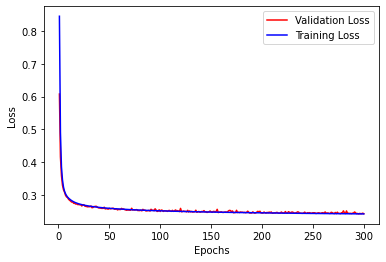

In [16]:
import matplotlib.pyplot as plt

val_loss = history_detection.history["val_loss"]
loss = history_detection.history["loss"]

epochs = range(1, 301)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [17]:
predictions_label = model_detection.predict(X_tst_detection)
predictions_label_rain = model_detection.predict(Xf_rain_tst_detection)
predictions_label_snow = model_detection.predict(Xf_snow_tst_detection)

In [18]:
y_pred = np.zeros([len(X_tst_detection),1])
for i in range(len(X_tst_detection)):
    y_pred[i,0] = np.argmax(predictions_label[i])
    
y_pred_rain = np.zeros([len(Xf_rain_tst_detection),1])
for i in range(len(Xf_rain_tst_detection)):
    y_pred_rain[i,0] = np.argmax(predictions_label_rain[i])
    
y_pred_snow = np.zeros([len(Xf_snow_tst_detection),1])
for i in range(len(Xf_snow_tst_detection)):
    y_pred_snow[i,0] = np.argmax(predictions_label_snow[i])    

### Metrics

In [19]:
### Detection Module

n_cc=1
n_cs=1
n_cr=1
n_sc=1
n_ss=1
n_sr=1
n_rc=1
n_rs=1
n_rr=1

precip_c= 3
precip_r= 2
precip_s= 1

for i in range(len(X_tst_detection)):
    label_predict = y_pred[i]
    label_actual = t_test[i]
    if label_predict==precip_c and label_actual==precip_c:
        n_cc+=1
    if label_predict==precip_s and label_actual==precip_s:
        n_ss+=1
    if label_predict==precip_r and label_actual==precip_r:
        n_rr+=1 
    if label_predict==precip_c and label_actual==precip_s:
        n_cs+=1
    if label_predict==precip_c and label_actual==precip_r:
        n_cr+=1
    if label_predict==precip_s and label_actual==precip_c:
        n_sc+=1
    if label_predict==precip_s and label_actual==precip_r:
        n_sr+=1  
    if label_predict==precip_r and label_actual==precip_c:
        n_rc+=1
    if label_predict==precip_r and label_actual==precip_s:
        n_rs+=1        
        
#Snow
TP_s = n_ss
TN_s = n_cc+n_cr+n_rc+n_rr
FP_s = n_sc+n_sr
FN_s = n_cs+n_rs

precision_s = TP_s/(TP_s+FP_s)
acc_s = (TP_s+TN_s)/(TP_s+TN_s+FP_s+FN_s)
recall_s = TP_s/(TP_s+FN_s)
f1_score_s = (2*precision_s*recall_s)/(precision_s+recall_s)
FPR_s = FP_s/(FP_s+TN_s)

#Rain
TP_r = n_rr
TN_r = n_cc+n_cs+n_sc+n_ss
FP_r = n_rc+n_rs
FN_r = n_cr+n_sr

precision_r = TP_r/(TP_r+FP_r)
acc_r = (TP_r+TN_r)/(TP_r+TN_r+FP_r+FN_r)
recall_r = TP_r/(TP_r+FN_r)
f1_score_r = (2*precision_r*recall_r)/(precision_r+recall_r)
FPR_r = FP_r/(FP_r+TN_r) 

print('\n For Rainfall Detection Over Coast:\n')
print('Precision: ',precision_r)
print('Accuracy: ',acc_r)
print('Recall (TPR): ',recall_r)
print('False Alarm (FPR): ',FPR_r)
print('\nF1 Score: ',f1_score_r)

print('----------------------------')
print('\n For Snwofall Detection Over Coast:\n')
print('Precision: ',precision_s)
print('Accuracy: ',acc_s)
print('Recall (TPR): ',recall_s)
print('False Alarm (FPR): ',FPR_s)
print('\nF1 Score: ',f1_score_s)

#Model
TP = n_cc+n_ss+n_rr
FP = n_cs+n_cr+n_sc+n_sr+n_rc+n_rs
FN = n_sc+n_rc+n_cs+n_rs+n_cr+n_sr

precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = (2*precision*recall)/(precision+recall)

print('----------------------------')
print('\n For Model Detection Over Coast:\n')
print('Precision: ',precision)
print('Recall (TPR): ',recall)
print('\nF1 Score: ',f1_score)


 For Rainfall Detection Over Coast:

Precision:  0.9229271348230456
Accuracy:  0.9393267166995578
Recall (TPR):  0.9608171134517515
False Alarm (FPR):  0.08286847923163643

F1 Score:  0.94149106113434
----------------------------

 For Snwofall Detection Over Coast:

Precision:  0.9577382954649705
Accuracy:  0.9393267166995578
Recall (TPR):  0.9171278807578552
False Alarm (FPR):  0.039181220231344974

F1 Score:  0.9369932685115931
----------------------------

 For Model Detection Over Coast:

Precision:  0.939312311836476
Recall (TPR):  0.939312311836476

F1 Score:  0.939312311836476


In [20]:
model_detection.evaluate(X_tst_detection, t_tst_detection, batch_size = batch_size1)

167/167 [==============================] - 0s 704us/step - loss: 0.2436 - recall: 0.8984


[0.24363692104816437, 0.8983533382415771]

# DNN - Retrieval Module

In [12]:
from tensorflow.keras import backend
def root_mean_squared_error(y_true, y_pred):
        return backend.sqrt(backend.mean(backend.square(y_pred-y_true)))
    
def mean_absolute_error(y_true, y_pred):
        return backend.mean(backend.abs(y_pred-y_true))        

In [14]:
del model_retrieval_snow,history_retrieval_snow

NameError: name 'model_retrieval_snow' is not defined

## Snow

In [13]:
# Parameters
hidden_units = 90
dropout = 0

# COAST
model_retrieval_snow = Sequential()

model_retrieval_snow.add(Dense(hidden_units))
model_retrieval_snow.add(Activation('relu'))
model_retrieval_snow.add(Dropout(dropout))

model_retrieval_snow.add(Dense(hidden_units))
model_retrieval_snow.add(Activation('relu'))
model_retrieval_snow.add(Dropout(dropout))

model_retrieval_snow.add(Dense(hidden_units))
model_retrieval_snow.add(Activation('relu'))
model_retrieval_snow.add(Dropout(dropout))

model_retrieval_snow.add(Dense(hidden_units))
model_retrieval_snow.add(Activation('relu'))
model_retrieval_snow.add(Dropout(dropout))

model_retrieval_snow.add(Dense(hidden_units))
model_retrieval_snow.add(Activation('relu'))
model_retrieval_snow.add(Dropout(dropout))

model_retrieval_snow.add(Dense(hidden_units))
model_retrieval_snow.add(Activation('relu'))
model_retrieval_snow.add(Dropout(dropout))

model_retrieval_snow.add(Dense(1))
model_retrieval_snow.add(Activation('relu'))

In [14]:
model_retrieval_snow.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00001),
              loss = root_mean_squared_error,
              metrics= mean_absolute_error)

In [15]:
from tensorflow import keras
callbacks_list = [
    keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=25,),
    keras.callbacks.ModelCheckpoint(
    filepath="checkpoint_path.keras",
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    )    
]

In [16]:
print('\nFitting DNN (Retrieval Module - Snow):\n')
batch_size2 = 600
history_retrieval_snow = model_retrieval_snow.fit(Xf_snow_trn_retrieval, yf_snow_trn_retrieval, epochs=500,
                                validation_split=.2, batch_size = batch_size2,
                                callbacks=callbacks_list, verbose=1)


Fitting DNN (Retrieval Module - Snow):

Epoch 1/500
234/234 [==============================] - 1s 4ms/step - loss: 1.0229 - mean_absolute_error: 0.6591 - val_loss: 0.8711 - val_mean_absolute_error: 0.4885
Epoch 2/500
234/234 [==============================] - 1s 3ms/step - loss: 0.7740 - mean_absolute_error: 0.4171 - val_loss: 0.7115 - val_mean_absolute_error: 0.3874
Epoch 3/500
234/234 [==============================] - 1s 3ms/step - loss: 0.7111 - mean_absolute_error: 0.3866 - val_loss: 0.6910 - val_mean_absolute_error: 0.3763
Epoch 4/500
234/234 [==============================] - 1s 3ms/step - loss: 0.6956 - mean_absolute_error: 0.3752 - val_loss: 0.6757 - val_mean_absolute_error: 0.3644
Epoch 5/500
234/234 [==============================] - 1s 3ms/step - loss: 0.6826 - mean_absolute_error: 0.3664 - val_loss: 0.6626 - val_mean_absolute_error: 0.3565
Epoch 6/500
234/234 [==============================] - 1s 3ms/step - loss: 0.6707 - mean_absolute_error: 0.3590 - val_loss: 0.6507 - v

234/234 [==============================] - 1s 3ms/step - loss: 0.6048 - mean_absolute_error: 0.3055 - val_loss: 0.5841 - val_mean_absolute_error: 0.2974
Epoch 51/500
234/234 [==============================] - 1s 3ms/step - loss: 0.6051 - mean_absolute_error: 0.3047 - val_loss: 0.5847 - val_mean_absolute_error: 0.2926
Epoch 52/500
234/234 [==============================] - 1s 3ms/step - loss: 0.6044 - mean_absolute_error: 0.3047 - val_loss: 0.5843 - val_mean_absolute_error: 0.2936
Epoch 53/500
234/234 [==============================] - 1s 3ms/step - loss: 0.6051 - mean_absolute_error: 0.3045 - val_loss: 0.5838 - val_mean_absolute_error: 0.2956
Epoch 54/500
234/234 [==============================] - 1s 3ms/step - loss: 0.6041 - mean_absolute_error: 0.3041 - val_loss: 0.5837 - val_mean_absolute_error: 0.2942
Epoch 55/500
234/234 [==============================] - 1s 3ms/step - loss: 0.6048 - mean_absolute_error: 0.3038 - val_loss: 0.5836 - val_mean_absolute_error: 0.2944
Epoch 56/500
234/

234/234 [==============================] - 1s 3ms/step - loss: 0.5983 - mean_absolute_error: 0.3000 - val_loss: 0.5818 - val_mean_absolute_error: 0.2916
Epoch 100/500
234/234 [==============================] - 1s 3ms/step - loss: 0.5989 - mean_absolute_error: 0.2999 - val_loss: 0.5817 - val_mean_absolute_error: 0.2932
Epoch 101/500
234/234 [==============================] - 1s 3ms/step - loss: 0.5988 - mean_absolute_error: 0.3001 - val_loss: 0.5817 - val_mean_absolute_error: 0.2913
Epoch 102/500
234/234 [==============================] - 1s 3ms/step - loss: 0.5982 - mean_absolute_error: 0.2997 - val_loss: 0.5817 - val_mean_absolute_error: 0.2905
Epoch 103/500
234/234 [==============================] - 1s 3ms/step - loss: 0.5978 - mean_absolute_error: 0.2991 - val_loss: 0.5818 - val_mean_absolute_error: 0.2940
Epoch 104/500
234/234 [==============================] - 1s 3ms/step - loss: 0.5991 - mean_absolute_error: 0.2996 - val_loss: 0.5816 - val_mean_absolute_error: 0.2932
Epoch 105/50

234/234 [==============================] - 1s 3ms/step - loss: 0.5944 - mean_absolute_error: 0.2976 - val_loss: 0.5809 - val_mean_absolute_error: 0.2903
Epoch 149/500
234/234 [==============================] - 1s 3ms/step - loss: 0.5930 - mean_absolute_error: 0.2971 - val_loss: 0.5810 - val_mean_absolute_error: 0.2903
Epoch 150/500
234/234 [==============================] - 1s 3ms/step - loss: 0.5949 - mean_absolute_error: 0.2974 - val_loss: 0.5809 - val_mean_absolute_error: 0.2904
Epoch 151/500
234/234 [==============================] - 1s 3ms/step - loss: 0.5949 - mean_absolute_error: 0.2971 - val_loss: 0.5812 - val_mean_absolute_error: 0.2892
Epoch 152/500
234/234 [==============================] - 1s 3ms/step - loss: 0.5940 - mean_absolute_error: 0.2974 - val_loss: 0.5811 - val_mean_absolute_error: 0.2895
Epoch 153/500
234/234 [==============================] - 1s 3ms/step - loss: 0.5943 - mean_absolute_error: 0.2973 - val_loss: 0.5810 - val_mean_absolute_error: 0.2897
Epoch 154/50

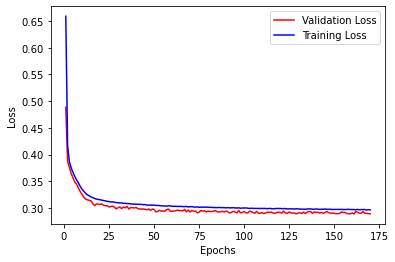

In [17]:
import matplotlib.pyplot as plt
val_loss = history_retrieval_snow.history["val_mean_absolute_error"]
loss = history_retrieval_snow.history["mean_absolute_error"]

epochs = range(1, 171)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [18]:
predictions_snow = model_retrieval_snow.predict(Xf_snow_tst_retrieval)

### Evaluation

In [19]:
model_retrieval_snow.evaluate(Xf_snow_tst_retrieval, yf_snow_tst_retrieval, batch_size = batch_size2)

126/126 [==============================] - 0s 665us/step - loss: 0.5972 - mean_absolute_error: 0.3043


[0.5972467660903931, 0.3043079078197479]

# Checking Outputs

In [20]:
from scipy.stats import gaussian_kde
x = yf_snow_tst_retrieval
y = predictions_snow
idx_snow = (x>0) & (y>0)
mask_TP=idx_snow[:,0]
y = np.delete(y, ~mask_TP)
x = np.delete(x, ~mask_TP)
xy = np.vstack([np.log(x),np.log(y)])
z = gaussian_kde(xy)(xy)

In [21]:
rmse = np.sqrt(np.mean(np.square(x-y)))
mae = np.mean(np.abs(x-y))
bias = np.sum(y-x)/len(x)
print('RMSE snow:', rmse, 'mm/hr')
print('MAE snow:', mae, 'mm/hr')
print('bias snow:', bias, 'mm/hr')

RMSE snow: 0.6042014366173275 mm/hr
MAE snow: 0.3042012601930194 mm/hr
bias snow: -0.01071088850713181 mm/hr


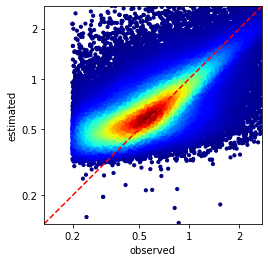

In [22]:
fig, ax = plt.subplots()
ax.scatter(np.log(x), np.log(y), c=z, s=10, cmap= 'jet')
plt.plot([-2, 1], [-2, 1],"r--")
ax.set_xlim(-2, 1)
ax.set_ylim(-2, 1)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks([np.log(0.2), np.log(0.5), np.log(1), np.log(2)])
ax.set_xticklabels(['0.2','0.5', '1', '2'])
ax.set_yticks([np.log(0.2), np.log(0.5), np.log(1), np.log(2)])
ax.set_yticklabels(['0.2','0.5', '1', '2'])
plt.xlabel("observed")
plt.ylabel("estimated")
plt.show()

## Rain

In [38]:
del model_retrieval_rain

In [40]:
# Parameters
hidden_units = 90
dropout = 0

# COAST
model_retrieval_rain = Sequential()

model_retrieval_rain.add(Dense(hidden_units))
model_retrieval_rain.add(Activation('relu'))
model_retrieval_rain.add(Dropout(dropout))

model_retrieval_rain.add(Dense(hidden_units))
model_retrieval_rain.add(Activation('relu'))
model_retrieval_rain.add(Dropout(dropout))

model_retrieval_rain.add(Dense(hidden_units))
model_retrieval_rain.add(Activation('relu'))
model_retrieval_rain.add(Dropout(dropout))

model_retrieval_rain.add(Dense(hidden_units))
model_retrieval_rain.add(Activation('relu'))
model_retrieval_rain.add(Dropout(dropout))

model_retrieval_rain.add(Dense(hidden_units))
model_retrieval_rain.add(Activation('relu'))
model_retrieval_rain.add(Dropout(dropout))

model_retrieval_rain.add(Dense(hidden_units))
model_retrieval_rain.add(Activation('relu'))
model_retrieval_rain.add(Dropout(dropout))

model_retrieval_rain.add(Dense(1))
model_retrieval_rain.add(Activation('relu'))

In [41]:
model_retrieval_rain.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00001),
              loss = root_mean_squared_error,
              metrics= mean_absolute_error)

In [42]:
from tensorflow import keras
callbacks_list = [
    keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=25,),
    keras.callbacks.ModelCheckpoint(
    filepath="checkpoint_path.keras",
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    )    
]

In [43]:
print('\nFitting DNN (Retrieval Module - Rain):\n')
batch_size2 = 600
history_retrieval_rain = model_retrieval_rain.fit(Xf_rain_trn_retrieval, yf_rain_trn_retrieval, epochs=500,
                                validation_split=.2, batch_size = batch_size2,
                                callbacks=callbacks_list, verbose=1)


Fitting DNN (Retrieval Module - Rain):

Epoch 1/500
234/234 [==============================] - 1s 5ms/step - loss: 5.6829 - mean_absolute_error: 2.2335 - val_loss: 5.5839 - val_mean_absolute_error: 2.0815
Epoch 2/500
234/234 [==============================] - 1s 4ms/step - loss: 5.3156 - mean_absolute_error: 1.9165 - val_loss: 5.1809 - val_mean_absolute_error: 1.8070
Epoch 3/500
234/234 [==============================] - 1s 4ms/step - loss: 4.9547 - mean_absolute_error: 1.7432 - val_loss: 4.8670 - val_mean_absolute_error: 1.7385
Epoch 4/500
234/234 [==============================] - 1s 5ms/step - loss: 4.7636 - mean_absolute_error: 1.7613 - val_loss: 4.7804 - val_mean_absolute_error: 1.7864
Epoch 5/500
234/234 [==============================] - 1s 5ms/step - loss: 4.7103 - mean_absolute_error: 1.7963 - val_loss: 4.7380 - val_mean_absolute_error: 1.7966
Epoch 6/500
234/234 [==============================] - 1s 5ms/step - loss: 4.6684 - mean_absolute_error: 1.8008 - val_loss: 4.7003 - v

234/234 [==============================] - 1s 5ms/step - loss: 3.8016 - mean_absolute_error: 1.2902 - val_loss: 3.8592 - val_mean_absolute_error: 1.2957
Epoch 100/500
234/234 [==============================] - 1s 5ms/step - loss: 3.8018 - mean_absolute_error: 1.2924 - val_loss: 3.8581 - val_mean_absolute_error: 1.3009
Epoch 101/500
234/234 [==============================] - 1s 4ms/step - loss: 3.7999 - mean_absolute_error: 1.2915 - val_loss: 3.8613 - val_mean_absolute_error: 1.2630
Epoch 102/500
234/234 [==============================] - 1s 5ms/step - loss: 3.7923 - mean_absolute_error: 1.2900 - val_loss: 3.8543 - val_mean_absolute_error: 1.2934
Epoch 103/500
234/234 [==============================] - 1s 5ms/step - loss: 3.7894 - mean_absolute_error: 1.2894 - val_loss: 3.8524 - val_mean_absolute_error: 1.2919
Epoch 104/500
234/234 [==============================] - 1s 5ms/step - loss: 3.7758 - mean_absolute_error: 1.2898 - val_loss: 3.8509 - val_mean_absolute_error: 1.2881
Epoch 105/50

234/234 [==============================] - 1s 5ms/step - loss: 3.6355 - mean_absolute_error: 1.2555 - val_loss: 3.7416 - val_mean_absolute_error: 1.2519
Epoch 198/500
234/234 [==============================] - 1s 5ms/step - loss: 3.6237 - mean_absolute_error: 1.2538 - val_loss: 3.7407 - val_mean_absolute_error: 1.2646
Epoch 199/500
234/234 [==============================] - 1s 5ms/step - loss: 3.6172 - mean_absolute_error: 1.2531 - val_loss: 3.7404 - val_mean_absolute_error: 1.2485
Epoch 200/500
234/234 [==============================] - 1s 5ms/step - loss: 3.6194 - mean_absolute_error: 1.2506 - val_loss: 3.7403 - val_mean_absolute_error: 1.2493
Epoch 201/500
234/234 [==============================] - 1s 4ms/step - loss: 3.6326 - mean_absolute_error: 1.2525 - val_loss: 3.7368 - val_mean_absolute_error: 1.2599
Epoch 202/500
234/234 [==============================] - 1s 4ms/step - loss: 3.6300 - mean_absolute_error: 1.2577 - val_loss: 3.7405 - val_mean_absolute_error: 1.2809
Epoch 203/50

234/234 [==============================] - 1s 4ms/step - loss: 3.4988 - mean_absolute_error: 1.2371 - val_loss: 3.7267 - val_mean_absolute_error: 1.2642
Epoch 296/500
234/234 [==============================] - 1s 4ms/step - loss: 3.5084 - mean_absolute_error: 1.2416 - val_loss: 3.7277 - val_mean_absolute_error: 1.2704
Epoch 297/500
234/234 [==============================] - 1s 4ms/step - loss: 3.5108 - mean_absolute_error: 1.2392 - val_loss: 3.7304 - val_mean_absolute_error: 1.2745
Epoch 298/500
234/234 [==============================] - 1s 4ms/step - loss: 3.5006 - mean_absolute_error: 1.2388 - val_loss: 3.7270 - val_mean_absolute_error: 1.2632
Epoch 299/500
234/234 [==============================] - 1s 4ms/step - loss: 3.4966 - mean_absolute_error: 1.2407 - val_loss: 3.7284 - val_mean_absolute_error: 1.2623
Epoch 300/500
234/234 [==============================] - 1s 4ms/step - loss: 3.4949 - mean_absolute_error: 1.2383 - val_loss: 3.7253 - val_mean_absolute_error: 1.2699
Epoch 301/50

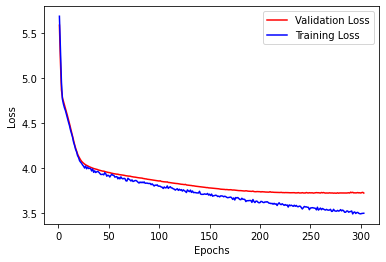

In [44]:
val_loss = history_retrieval_rain.history["val_loss"]
loss = history_retrieval_rain.history["loss"]

epochs = range(1, 304)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [45]:
predictions_rain = model_retrieval_rain.predict(Xf_rain_tst_retrieval)

### Evaluation

In [46]:
model_retrieval_rain.evaluate(Xf_rain_tst_retrieval, yf_rain_tst_retrieval, batch_size = batch_size2)

125/125 [==============================] - 0s 862us/step - loss: 3.9410 - mean_absolute_error: 1.3309


[3.941049098968506, 1.3308517932891846]

# Checking Outputs

In [47]:
from scipy.stats import gaussian_kde
x = yf_rain_tst_retrieval
y = predictions_rain
idx_snow = (x>0) & (y>0)
mask_TP=idx_snow[:,0]
y = np.delete(y, ~mask_TP)
x = np.delete(x, ~mask_TP)
xy = np.vstack([np.log(x),np.log(y)])
z = gaussian_kde(xy)(xy)

In [48]:
rmse = np.sqrt(np.mean(np.square(x-y)))
mae = np.mean(np.abs(x-y))
bias = np.sum(y-x)/len(x)
print('RMSE rain:', rmse, 'mm/hr')
print('MAE rain:', mae, 'mm/hr')
print('bias rain:', bias, 'mm/hr')

RMSE rain: 4.053683528854963 mm/hr
MAE rain: 1.3334535935704872 mm/hr
bias rain: -0.08377477891414294 mm/hr


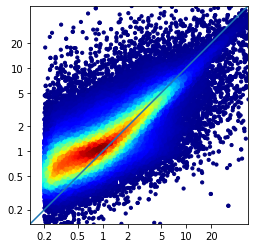

In [49]:
fig, ax = plt.subplots()
ax.scatter(np.log(x), np.log(y), c=z, s=10, cmap= 'jet')
plt.plot([-2, 4], [-2, 4])
ax.set_xlim(-2, 4)
ax.set_ylim(-2, 4)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks([np.log(0.2), np.log(0.5), np.log(1), np.log(2) , np.log(5) , np.log(10) , np.log(20)])
ax.set_xticklabels(['0.2','0.5', '1', '2', '5', '10', '20'])
ax.set_yticks([np.log(0.2), np.log(0.5), np.log(1), np.log(2), np.log(5) , np.log(10), np.log(20)])
ax.set_yticklabels(['0.2','0.5', '1', '2', '5', '10', '20'])
plt.show()

In [51]:
model_detection.save('Models\DPR\Coast\model_dtc',save_format='h5')
model_retrieval_snow.save('Models\DPR\Coast\model_snow',save_format='h5')
model_retrieval_rain.save('Models\DPR\Coast\model_rain',save_format='h5')

In [23]:
model_retrieval_snow.save('Models\DPR\Coast\model_snow_lb',save_format='h5')

In [52]:
import scipy
from scipy.io import savemat

fp_DPR_coast = 'Models/DPR/coast/files_DPR_coast.mat'
scipy.io.savemat(fp_DPR_coast, {'mean_detection_DPR_coast': mean_detection,'std_detection_DPR_coast':std_detection,
                               'mean_snow_retrieval_DPR_coast': mean_snow_retrieval,'std_snow_retrieval_DPR_coast':std_snow_retrieval,
                               'mean_rain_retrieval_DPR_coast': mean_rain_retrieval,'std_rain_retrieval_DPR_coast':std_rain_retrieval})


## Save Files

In [53]:
import scipy
from scipy.io import savemat

In [54]:
import scipy
from scipy.io import savemat

fp_DNN_rain_detection = 'label_pred_rain_coast_DPR.mat'
fp_actual_rain_detection = 't_test_label_rain_coast_DPR.mat'
scipy.io.savemat(fp_DNN_rain_detection, {'label_pred_rain_coast_DPR': y_pred_rain})
scipy.io.savemat(fp_actual_rain_detection, {'t_test_label_rain_coast_DPR': tf_test_rain})

fp_DNN_snow_detection = 'label_pred_snow_coast_DPR.mat'
fp_actual_snow_detection = 't_test_label_snow_coast_DPR.mat'
scipy.io.savemat(fp_DNN_snow_detection, {'label_pred_snow_coast_DPR': y_pred_snow})
scipy.io.savemat(fp_actual_snow_detection, {'t_test_label_snow_coast_DPR': tf_test_snow})

fp_DNN_snow_retrieval = 'rate_pred_snow_coast_DPR.mat'
fp_actual_snow_retrieval = 't_test_rate_snow_coast_DPR.mat'
scipy.io.savemat(fp_DNN_snow_retrieval, {'rate_pred_snow_coast_DPR': predictions_snow})
scipy.io.savemat(fp_actual_snow_retrieval, {'t_test_rate_snow_coast_DPR': yf_snow_tst_retrieval})

fp_DNN_rain_retrieval = 'rate_pred_rain_coast_DPR.mat'
fp_actual_rain_retrieval = 't_test_rate_rain_coast_DPR.mat'
scipy.io.savemat(fp_DNN_rain_retrieval, {'rate_pred_rain_coast_DPR': predictions_rain})
scipy.io.savemat(fp_actual_rain_retrieval, {'t_test_rate_rain_coast_DPR': yf_rain_tst_retrieval})

## Observation Orbits

In [ ]:
g = h5py.File("Orbital/Orbit6308_dics.mat",'r')
list(g.keys())

In [ ]:
X0_detection = g['X_detection']
X1_detection = np.transpose(X0_detection)
X2_detection = np.transpose(X1_detection)

X0_snow_retrieval = g['x_retrieval_DPR_snow_coast']
X1_snow_retrieval = np.transpose(X0_snow_retrieval)

X0_rain_retrieval = g['x_retrieval_DPR_rain_coast']
X1_rain_retrieval = np.transpose(X0_rain_retrieval)

In [ ]:
X3_detection = X2_detection-mean_detection
X_detection = X3_detection/std_detection

X2_snow_retrieval = X1_snow_retrieval-mean_snow_retrieval
X_snow_retrieval = X2_snow_retrieval/std_snow_retrieval

X2_rain_retrieval = X1_rain_retrieval-mean_rain_retrieval
X_rain_retrieval = X2_rain_retrieval/std_rain_retrieval

In [ ]:
label_pred_obs = model_detection.predict(X_detection)

In [ ]:
y_pred_obs = np.zeros([len(X_detection),1])
for i in range(len(X_detection)):
    y_pred_obs[i,0] = np.argmax(label_pred_obs[i])

In [ ]:
rate_snow_pred_obs = model_retrieval_snow.predict(X_snow_retrieval)
rate_rain_pred_obs = model_retrieval_rain.predict(X_rain_retrieval)

In [ ]:
import scipy
from scipy.io import savemat

fp_detection = 'label_pred_coast_DPR_6308.mat'
fp_snow_retrieval = 'rate_snow_pred_coast_DPR_6308.mat'
fp_rain_retrieval = 'rate_rain_pred_coast_DPR_6308.mat'

scipy.io.savemat(fp_detection, {'label_pred_coast_DPR': y_pred_obs})
scipy.io.savemat(fp_snow_retrieval, {'rate_snow_pred_coast_DPR': rate_snow_pred_obs})    
scipy.io.savemat(fp_rain_retrieval, {'rate_rain_pred_coast_DPR': rate_rain_pred_obs})